# Webscraping Images

In [416]:
#Libraries
import os
import sys
import time
import requests
from PIL import Image
from time import sleep
from random import randint
from bs4 import BeautifulSoup
from selenium import webdriver
from tqdm.notebook import tqdm
from IPython.display import display
from selenium.webdriver.common.by import By

#Parameters to avoid bot detection
options = webdriver.ChromeOptions()
headers = {'User-Agent': 'Mozilla/5.0'}
options.add_argument('start-maximized')
options.add_experimental_option("useAutomationExtension", False)
options.add_argument("--disable-blink-features=AutomationControlled") 
options.add_experimental_option("excludeSwitches", ["enable-automation"])

#Initiate web driver
driver = webdriver.Chrome(options=options)
driver.execute_cdp_cmd("Page.removeScriptToEvaluateOnNewDocument", {"identifier":"1"})
driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")

In [417]:
#Functions
def sleep_time(min, max):
    """
    Pause time before continuing program.
    """
    return sleep(randint(min, max)) 

def retrieve_image_urls_from_page(driver, page, which=None):
    """
    Extract and download yearbook page.

    Inputs:
        - driver (obj): browser to use for scraping
        - page (int): number of page we want to download

    Returns: list of strings containing images of pages to download.
    """
    #Load page
    page_url = f'https://www.classmates.com/siteui/yearbooks/4182755124?page={page}'
    driver.get(page_url)
    sleep_time(3, 4)

    #Parse HTML code
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    #Store image URL
    img_urls = []
    if page == 1:       # edge case
       img_url = soup.find_all('img', class_='yb-page-image-cache hidden')[1].attrs['src']
       img_urls.append(img_url)
    elif page == 296:   # edge case
        img_url = soup.find_all('img', class_='yb-page-image-cache hidden')[0].attrs['src']
        img_urls.append(img_url)
    else:
        if which == 'left':
            image = soup.find_all('img', class_='yb-page-image-cache hidden')[0]
            img_urls.append(image.attrs['src'])
        if which == 'right':
            image = soup.find_all('img', class_='yb-page-image-cache hidden')[1]
            img_urls.append(image.attrs['src'])
        else:
            images = soup.find_all('img', class_='yb-page-image-cache hidden')
            for image in images:
                img_urls.append(image.attrs['src'])
    
    return img_urls

def store_images(urls):
    """
    Stores images in local directory

    Input: urls (list): list of strings containing urls to download.

    Returns: nothing, just stores images in predetermined local directory.
    """
    #Download image
    for img_url in urls:
        response = requests.get(img_url, headers=headers)
        sleep_time(3, 4)
        filename = img_url.split("/")[-1].split("?")[0]
        with open(os.path.join('pages', filename), 'wb') as f:
            f.write(response.content)


Now, we log into classmates.com:

In [418]:
#Variables
login_url = 'https://www.classmates.com/siteui/yearbooks/4182755124?page=1'
user = 'scraping.task@gmail.com'
pswd = 'webscraping'

#Fill information
driver.get(login_url)
ids = [('loginEmail',user), ('loginPassword', pswd)]
for id in ids:
    element = driver.find_element(By.ID, id[0])
    element.clear()
    sleep_time(3, 4)
    element.send_keys(id[1])

#Log in
login = driver.find_element(By.ID, 'login-button')
sleep_time(3, 4)
login.click()

We scrape the right page from the proposed URL and display it to see if the scraping worked:

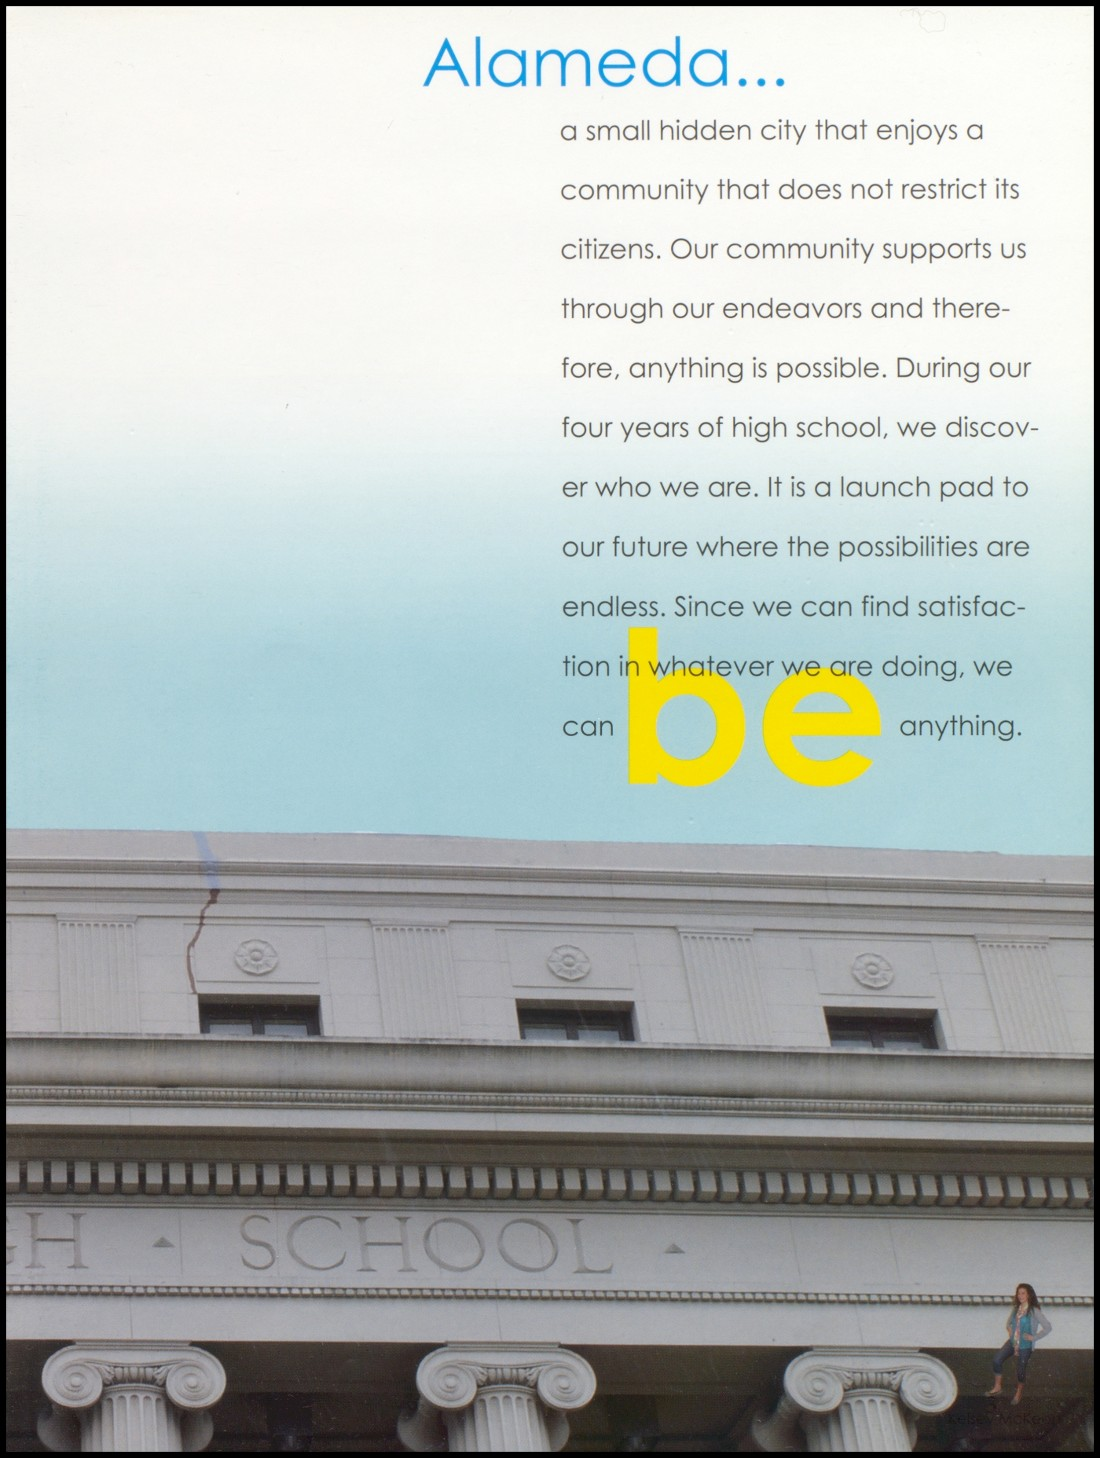

In [419]:
page = 7
img_urls = retrieve_image_urls_from_page(driver, page, which='right')
store_images(img_urls)
display(Image.open(f'pages/000{page}.jpg'))

## Step 2

We will start scraping all the pages of the yearbook. You may notice that you need to register an account in order to proceed. Follow the instructions to register an account
and write code to automatically log in. You have to complete this step in order to do step 3.

### **Answer**:

For step 1 we already registered an account and wrote code to automatically log in. Therefore, we move on to step 3.

## Step 3

Please scrape all the pages of the yearbook (2010-Alameda-High-School).

### **Answer**:

The ideal approach here would be to look for a 'right arrow' button to traverse the album after retrieving the image, but it appears there isn't an HTML object like that in the page's source code. However, if we look at this particular yearbook we can see that it has 296 pages, so we can extract all images using a simple for loop.

In [420]:
#Scrape whole yearbook
pages = list(range(1,298,2))
pages[-1] -= 1
total_downloads = 0
for page in pages:
    img_urls = retrieve_image_urls_from_page(driver, page)
    store_images(img_urls)
    total_downloads += len(img_urls)
    print('Progress:', f'{round((total_downloads/296)*100,1)}%')

Progress: 0.3%
Progress: 1.0%
Progress: 1.7%
Progress: 2.4%
Progress: 3.0%
Progress: 3.7%
Progress: 4.4%
Progress: 5.1%
Progress: 5.7%
Progress: 6.4%
Progress: 7.1%
Progress: 7.8%
Progress: 8.4%
Progress: 9.1%
Progress: 9.8%
Progress: 10.5%
Progress: 11.1%
Progress: 11.8%
Progress: 12.5%
Progress: 13.2%
Progress: 13.9%
Progress: 14.5%
Progress: 15.2%
Progress: 15.9%
Progress: 16.6%
Progress: 17.2%
Progress: 17.9%
Progress: 18.6%
Progress: 19.3%
Progress: 19.9%
Progress: 20.6%
Progress: 21.3%
Progress: 22.0%
Progress: 22.6%
Progress: 23.3%
Progress: 24.0%
Progress: 24.7%
Progress: 25.3%
Progress: 26.0%
Progress: 26.7%
Progress: 27.4%
Progress: 28.0%
Progress: 28.7%
Progress: 29.4%
Progress: 30.1%
Progress: 30.7%
Progress: 31.4%
Progress: 32.1%
Progress: 32.8%
Progress: 33.4%
Progress: 34.1%
Progress: 34.8%
Progress: 35.5%
Progress: 36.1%
Progress: 36.8%
Progress: 37.5%
Progress: 38.2%
Progress: 38.9%
Progress: 39.5%
Progress: 40.2%
Progress: 40.9%
Progress: 41.6%
Progress: 42.2%
Progres